# Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Import des fichiers TEST et TRAIN

### TRAIN

In [2]:
df_train = pd.read_csv("Data_Base_Enhanced/final_train.csv", header = 0, sep = ',')

In [3]:
df_train_copie = df_train

In [4]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
0,100006,0,Cash loans,F,0,1,0,135000.0,Working,Secondary,...,8.67,0.000,1620000.0,0.000,0.000,0.0,0.0,0.000,0.0,0.000
1,100011,0,Cash loans,F,0,1,0,112500.0,Pensioner,Secondary,...,3.21,4031676.225,12150000.0,180000.000,4028055.255,0.0,0.0,180000.000,0.0,0.000
2,100021,0,Revolving loans,F,0,1,1,81000.0,Working,Secondary,...,4.76,0.000,11475000.0,0.000,0.000,0.0,0.0,44602.512,0.0,12537.180
3,100023,0,Cash loans,F,0,1,1,90000.0,State servant,Higher education,...,3.12,0.000,1080000.0,0.000,0.000,0.0,0.0,3300.000,0.0,0.000
4,100036,0,Cash loans,F,0,1,0,112500.0,Working,Secondary,...,4.66,0.000,945000.0,0.000,0.000,0.0,0.0,58050.000,3120.0,15252.117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86900,456242,0,Cash loans,M,1,1,0,198000.0,Commercial associate,Secondary,...,3.82,1185858.630,1620000.0,318798.270,1182060.630,0.0,0.0,184500.000,0.0,134298.270
86901,456244,0,Cash loans,F,0,1,0,261000.0,Working,Higher education,...,2.69,5405223.960,12150000.0,1100537.910,5361449.490,0.0,0.0,1003500.000,0.0,96883.650
86902,456246,0,Cash loans,F,0,1,1,94500.0,Working,Secondary,...,4.51,105093.855,1080000.0,121594.050,103183.155,0.0,0.0,0.000,0.0,121594.050
86903,456247,0,Cash loans,F,0,1,0,112500.0,Commercial associate,Higher education,...,4.89,2205557.640,13680000.0,204203.115,2197183.095,3.0,2.0,202950.000,0.0,1253.115


### TEST

In [5]:
df_test = pd.read_csv("Data_Base_Enhanced/final_test.csv", header = 0, sep = ',')

In [6]:
df_test_copie = df_test

In [7]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
0,100013,Cash loans,M,1,1,0,202500.0,630000.0,Working,Higher education,...,9.52,1743352.245,12645000.0,571500.00,1737703.665,1.0,1.0,598290.000000,0.000000,19028.919000
1,100028,Cash loans,F,0,1,2,315000.0,1575000.0,Working,Secondary,...,3.02,396167.850,11025000.0,301663.62,390461.850,0.0,0.0,51599.389547,1119.726821,286961.461561
2,100042,Cash loans,F,1,1,0,270000.0,810000.0,State servant,Secondary,...,3.48,2801919.375,6615000.0,497606.49,2797043.760,2.0,0.0,265500.000000,207931.500000,24174.990000
3,100066,Cash loans,F,0,1,0,315000.0,315000.0,State servant,Higher education,...,7.35,0.000,1089000.0,0.00,0.000,0.0,0.0,55260.000000,3120.000000,23077.608000
4,100067,Cash loans,F,1,1,1,162000.0,45000.0,Working,Higher education,...,10.60,2364897.465,3915000.0,281621.34,2363711.400,3.0,3.0,66600.000000,0.000000,215021.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,456115,Cash loans,M,0,1,1,225000.0,846000.0,State servant,Secondary,...,3.64,0.000,1080000.0,0.00,0.000,0.0,0.0,76158.486000,0.000000,17406.882000
16649,456119,Cash loans,F,0,1,0,247500.0,585000.0,Pensioner,Higher education,...,5.31,5186769.615,9090000.0,236250.00,5186653.965,21.0,21.0,236250.000000,0.000000,0.000000
16650,456168,Cash loans,F,0,1,0,135000.0,765000.0,Working,Secondary,...,5.29,0.000,2520000.0,0.00,0.000,0.0,0.0,41100.000000,9360.000000,319.050000
16651,456189,Cash loans,F,0,1,0,270000.0,360000.0,Commercial associate,Secondary,...,7.35,3067911.180,10998000.0,305973.90,3057011.640,0.0,0.0,159750.000000,0.000000,146223.900000


# Analyse

In [8]:
df_train.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
count,86905.000000,86905.000000,86905.000000,86905.000000,86905.000000,8.690500e+04,86905.000000,86905.000000,86905.000000,86905.000000,...,86905.000000,8.690500e+04,8.690500e+04,8.690500e+04,8.690500e+04,86905.000000,86905.000000,8.690500e+04,8.690500e+04,8.690500e+04
mean,278517.681250,0.086692,0.331074,0.719303,0.413866,1.762197e+05,0.021481,0.999436,2.179679,2.006985,...,4.931181,2.194196e+06,5.681247e+06,2.783573e+05,2.186740e+06,352.671216,10.612151,2.111651e+05,1.037594e+04,1.071416e+05
std,102707.713481,0.281385,0.470602,0.449342,0.728599,1.049368e+05,0.014077,0.023739,0.897869,0.492893,...,1.971913,3.266996e+06,5.167003e+06,4.450129e+05,3.263126e+06,3854.154184,921.013325,2.941590e+05,6.032503e+04,2.967365e+05
min,100006.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000533,0.000000,1.000000,1.000000,...,2.160000,-1.260000e+05,0.000000e+00,0.000000e+00,-1.726412e+05,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,189653.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,0.010147,1.000000,2.000000,2.000000,...,3.430000,0.000000e+00,1.350000e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,2.250000e+04,0.000000e+00,0.000000e+00
50%,278728.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,0.019101,1.000000,2.000000,2.000000,...,4.600000,7.385753e+05,3.960000e+06,1.469785e+05,7.298732e+05,0.000000,0.000000,1.136813e+05,0.000000e+00,2.004362e+04
75%,367775.000000,0.000000,1.000000,1.000000,1.000000,2.250000e+05,0.028663,1.000000,3.000000,2.000000,...,5.790000,3.075180e+06,9.090000e+06,3.673708e+05,3.061621e+06,0.000000,0.000000,2.835000e+05,0.000000e+00,1.095180e+05
max,456248.000000,1.000000,1.000000,1.000000,19.000000,1.350000e+07,0.072508,1.000000,20.000000,3.000000,...,11.070000,2.998048e+07,3.285000e+07,1.846930e+07,3.046124e+07,133147.000000,124412.000000,8.384850e+06,3.192750e+06,1.837291e+07


In [9]:
df_test.describe()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
count,16653.000000,16653.000000,16653.000000,16653.000000,1.665300e+04,1.665300e+04,16653.000000,16653.000000,16653.000000,16653.000000,...,16653.000000,1.665300e+04,1.665300e+04,1.665300e+04,1.665300e+04,16653.000000,16653.000000,1.665300e+04,1.665300e+04,1.665300e+04
mean,277670.565904,0.325647,0.708641,0.393202,1.824399e+05,4.568521e+05,0.021935,0.999700,2.166276,1.983306,...,6.046745,1.993886e+06,5.821279e+06,2.615679e+05,1.986243e+06,300.443584,21.094277,1.913691e+05,8.063663e+03,1.232985e+05
std,103153.608852,0.468630,0.454402,0.708096,1.003905e+05,3.197559e+05,0.014545,0.017326,0.875597,0.499901,...,2.093844,3.276256e+06,5.549177e+06,5.074398e+05,3.270811e+06,3803.628239,1394.564833,2.755528e+05,4.710350e+04,3.943738e+05
min,100013.000000,0.000000,0.000000,0.000000,2.694150e+04,4.500000e+04,0.001276,0.000000,1.000000,1.000000,...,1.080000,-8.120745e+03,0.000000e+00,-1.687500e+03,-8.629560e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,188997.000000,0.000000,0.000000,0.000000,1.170000e+05,2.250000e+05,0.010147,1.000000,2.000000,2.000000,...,4.590000,0.000000e+00,1.620000e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,2.340000e+04,0.000000e+00,1.462500e+02
50%,278157.000000,0.000000,1.000000,0.000000,1.575000e+05,4.095000e+05,0.019101,1.000000,2.000000,2.000000,...,5.330000,4.872546e+05,3.375000e+06,1.200029e+05,4.805748e+05,0.000000,0.000000,9.000000e+04,0.000000e+00,3.691170e+04
75%,367043.000000,1.000000,1.000000,1.000000,2.250000e+05,5.985000e+05,0.028663,1.000000,3.000000,2.000000,...,7.340000,2.514940e+06,9.180000e+06,3.354229e+05,2.500224e+06,0.000000,0.000000,2.452385e+05,3.342890e+02,1.319328e+05
max,456250.000000,1.000000,1.000000,8.000000,4.410000e+06,1.800000e+06,0.072508,1.000000,10.000000,3.000000,...,18.800000,2.517334e+07,3.323250e+07,3.029332e+07,2.509531e+07,150483.000000,150483.000000,4.770000e+06,1.529712e+06,3.029332e+07


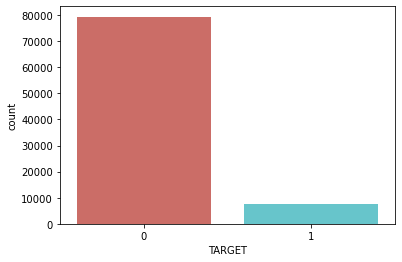

In [10]:
sns.countplot(x = df_train['TARGET'], data = df_train, palette = 'hls')
plt.show()

In [11]:
df_train.groupby(df_train['TARGET']).mean()

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
TARGET,,,,,,,,,,,,,,,,,,,,,
0,278635.693251,0.334417,0.719205,0.410150,176790.821010,0.021650,0.999471,2.176677,1.996938,0.013090,...,4.925425,2.175411e+06,5.753616e+06,275110.606951,2.168291e+06,356.906175,8.633871,208539.719229,10268.311939,108074.884288
1,277274.419963,0.295859,0.720334,0.453013,170202.616605,0.019708,0.999071,2.211309,2.112822,0.012344,...,4.991816,2.392099e+06,4.918842e+06,312561.112727,2.381107e+06,308.055747,31.453411,238823.838338,11509.857835,97309.395753


In [12]:
df_train.corr()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
SK_ID_CURR,1.000000,-0.003729,0.000219,0.004641,-0.001512,0.001514,-0.007047,0.004830,-0.002577,0.005446,...,0.000228,0.004170,0.004690,0.003198,0.004165,-0.001441,-0.002797,0.001969,0.006714,0.001223
TARGET,-0.003729,1.000000,-0.023055,0.000707,0.016554,-0.017666,-0.038819,-0.004741,0.010853,0.066156,...,0.009474,0.018663,-0.045460,0.023680,0.018352,-0.003566,0.006972,0.028969,0.005791,-0.010209
FLAG_OWN_CAR,0.000219,-0.023055,1.000000,0.001046,0.095788,0.168159,0.039372,-0.004921,0.141537,-0.017708,...,0.006886,0.003876,0.043223,0.049676,0.003882,0.004515,-0.003599,0.032134,0.009017,0.053249
FLAG_OWN_REALTY,0.004641,0.000707,0.001046,1.000000,-0.007597,0.018160,0.010399,-0.000814,0.001600,0.004228,...,0.025749,-0.027733,-0.024270,-0.001817,-0.027779,-0.007211,0.000898,-0.010426,-0.007516,0.006000
CNT_CHILDREN,-0.001512,0.016554,0.095788,-0.007597,1.000000,0.005510,-0.025013,-0.005136,0.884824,0.027806,...,0.041393,-0.020694,-0.038799,0.004280,-0.020811,-0.004787,0.000416,-0.018341,0.004383,0.021177
AMT_INCOME_TOTAL,0.001514,-0.017666,0.168159,0.018160,0.005510,1.000000,0.179036,-0.005179,0.005437,-0.207487,...,-0.044294,0.086943,0.128950,0.164578,0.086935,-0.009565,0.003810,0.103330,0.014377,0.143270
REGION_POPULATION_RELATIVE,-0.007047,-0.038819,0.039372,0.010399,-0.025013,0.179036,1.000000,-0.002254,-0.023395,-0.549371,...,-0.016644,0.062784,0.093477,0.069247,0.062916,0.001655,-0.000897,0.055011,-0.011026,0.055860
FLAG_CONT_MOBILE,0.004830,-0.004741,-0.004921,-0.000814,-0.005136,-0.005179,-0.002254,1.000000,-0.004425,0.006237,...,-0.009971,0.002915,0.002020,-0.000077,0.002918,0.002169,0.000253,0.001380,0.000501,-0.003802
CNT_FAM_MEMBERS,-0.002577,0.010853,0.141537,0.001600,0.884824,0.005437,-0.023395,-0.004425,1.000000,0.032188,...,0.020283,-0.005504,-0.007209,0.015059,-0.005602,-0.004457,0.000815,-0.001893,0.009534,0.022999
REGION_RATING_CLIENT_W_CITY,0.005446,0.066156,-0.017708,0.004228,0.027806,-0.207487,-0.549371,0.006237,0.032188,1.000000,...,-0.003881,-0.061374,-0.084503,-0.068771,-0.061387,0.001089,0.004391,-0.052893,0.016992,-0.057720


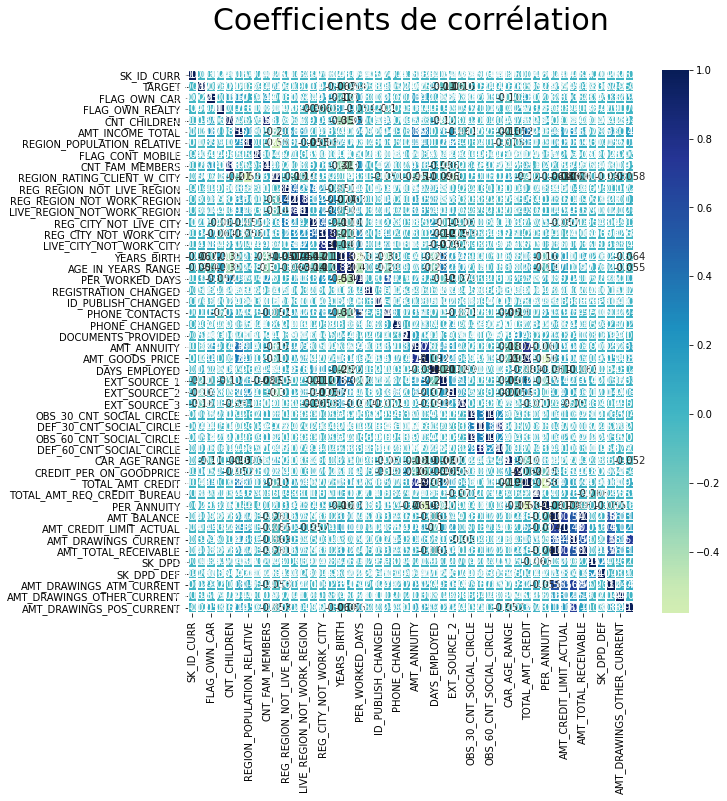

In [13]:
plt.figure(figsize = (10,10))
plt.title ('Coefficients de corrélation\n', size = 30)
sns.heatmap(df_train.corr(),annot =True, linewidth=1, cmap="YlGnBu" , center=0)
plt.show()

# Mise à plat de la donnée

### TARGET

In [14]:
# récupération des colonnes à reformer
colonne_reform = []

columnes_with_str = df_train.columns

for i in columnes_with_str :
    cran = 1
    while cran != 0 :
        if df_train[i][0] != np.nan :
            cran = 0
            if type(df_train[i][0]) == str :
                colonne_reform.append(i)

colonne_reform

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [15]:
# pour chaque colonne, on crée des variables muettes nécessaires puis on les ajoute à la fin du data frame
for var in colonne_reform:
    tmp  = pd.get_dummies(df_train[var] , prefix = var)
    df_train = df_train.join(tmp)

In [16]:
# on supprime les colonnes que l'on a mis à plat
df_train = df_train.drop(colonne_reform,axis = 1)

In [17]:
# on retir la colonne CODE_GENDER_M car une seule colonnes de genre suffit
df_train = df_train.drop(["CODE_GENDER_M"],axis = 1)

In [18]:
df_train

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,100006,0,0,1,0,135000.0,0.008019,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
1,100011,0,0,1,0,112500.0,0.018634,1,2.0,2,...,0,0,0,0,0,0,0,0,1,0
2,100021,0,0,1,1,81000.0,0.010966,1,3.0,2,...,0,0,0,0,0,0,0,0,0,0
3,100023,0,0,1,1,90000.0,0.015221,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
4,100036,0,0,1,0,112500.0,0.008575,1,2.0,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86900,456242,0,1,1,0,198000.0,0.072508,1,2.0,1,...,0,0,0,0,0,0,0,0,0,0
86901,456244,0,0,1,0,261000.0,0.031329,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
86902,456246,0,0,1,1,94500.0,0.010966,1,3.0,2,...,0,1,0,0,0,0,0,0,0,0
86903,456247,0,0,1,0,112500.0,0.022800,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train.head(5)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,100006,0,0,1,0,135000.0,0.008019,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
1,100011,0,0,1,0,112500.0,0.018634,1,2.0,2,...,0,0,0,0,0,0,0,0,1,0
2,100021,0,0,1,1,81000.0,0.010966,1,3.0,2,...,0,0,0,0,0,0,0,0,0,0
3,100023,0,0,1,1,90000.0,0.015221,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
4,100036,0,0,1,0,112500.0,0.008575,1,2.0,2,...,0,0,0,0,0,1,0,0,0,0


### TEST

In [20]:
# récupération des colonnes à reformer
colonne_reform = []

columnes_with_str = df_test.columns

for i in columnes_with_str :
    cran = 1
    while cran != 0 :
        if df_test[i][0] != np.nan :
            cran = 0
            if type(df_test[i][0]) == str :
                colonne_reform.append(i)

colonne_reform

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [21]:
# pour chaque colonne, on crée des variables muettes nécessaires puis on les ajoute à la fin du data frame
for var in colonne_reform:
    tmp  = pd.get_dummies(df_test[var] , prefix = var)
    df_test = df_test.join(tmp)

In [22]:
# on supprime les colonnes que l'on a mis à plat
df_test = df_test.drop(colonne_reform,axis = 1)

In [23]:
# on retir la colonne CODE_GENDER_M car une seule colonnes de genre suffit
df_test = df_test.drop(["CODE_GENDER_M"],axis = 1)

In [24]:
df_test

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University
0,100013,1,1,0,202500.0,630000.0,0.019101,1,2.0,2,...,0,0,0,0,0,0,0,0,1,0
1,100028,0,1,2,315000.0,1575000.0,0.026392,1,4.0,2,...,0,0,0,0,0,0,0,0,0,0
2,100042,1,1,0,270000.0,810000.0,0.025164,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
3,100066,0,1,0,315000.0,315000.0,0.046220,1,2.0,1,...,0,1,0,0,0,0,0,0,0,0
4,100067,1,1,1,162000.0,45000.0,0.018634,1,3.0,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,456115,0,1,1,225000.0,846000.0,0.006305,1,3.0,3,...,0,0,0,0,0,0,0,0,0,0
16649,456119,0,1,0,247500.0,585000.0,0.025164,1,1.0,2,...,0,1,0,0,0,0,0,0,0,0
16650,456168,0,1,0,135000.0,765000.0,0.025164,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
16651,456189,0,1,0,270000.0,360000.0,0.026392,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0


### ==> Il n'y a que 149 colonnes dans le jeu de données TEST, contre 152 pour le TRAIN, après la mise à plat des colonnes de nos eux de données : il faut égaliser tt ça

In [25]:
train_colonnes = df_train.columns

In [26]:
test_colonnes = df_test.columns

In [27]:
over_cln = []

for i in train_colonnes :
    if i in test_colonnes :
        print(f'{i} => ok !')
    else :
        over_cln.append(i)
#         print(f'{i} => KO !')

SK_ID_CURR => ok !
FLAG_OWN_CAR => ok !
FLAG_OWN_REALTY => ok !
CNT_CHILDREN => ok !
AMT_INCOME_TOTAL => ok !
REGION_POPULATION_RELATIVE => ok !
FLAG_CONT_MOBILE => ok !
CNT_FAM_MEMBERS => ok !
REGION_RATING_CLIENT_W_CITY => ok !
REG_REGION_NOT_LIVE_REGION => ok !
REG_REGION_NOT_WORK_REGION => ok !
LIVE_REGION_NOT_WORK_REGION => ok !
REG_CITY_NOT_LIVE_CITY => ok !
REG_CITY_NOT_WORK_CITY => ok !
LIVE_CITY_NOT_WORK_CITY => ok !
YEARS_BIRTH => ok !
AGE_IN_YEARS_RANGE => ok !
PER_WORKED_DAYS => ok !
REGISTRATION_CHANGED => ok !
ID_PUBLISH_CHANGED => ok !
PHONE_CONTACTS => ok !
PHONE_CHANGED => ok !
DOCUMENTS_PROVIDED => ok !
AMT_ANNUITY => ok !
AMT_GOODS_PRICE => ok !
DAYS_EMPLOYED => ok !
EXT_SOURCE_1 => ok !
EXT_SOURCE_2 => ok !
EXT_SOURCE_3 => ok !
OBS_30_CNT_SOCIAL_CIRCLE => ok !
DEF_30_CNT_SOCIAL_CIRCLE => ok !
OBS_60_CNT_SOCIAL_CIRCLE => ok !
DEF_60_CNT_SOCIAL_CIRCLE => ok !
CAR_AGE_RANGE => ok !
CREDIT_PER_ON_GOODPRICE => ok !
TOTAL_AMT_CREDIT => ok !
TOTAL_AMT_REQ_CREDIT_BUREAU => 

In [28]:
over_cln

['TARGET',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed']

In [29]:
df_test['NAME_INCOME_TYPE_Maternity leave'] = 0
df_test['NAME_INCOME_TYPE_Student'] = 0
df_test['NAME_INCOME_TYPE_Unemployed'] = 0

In [30]:
df_test

,SK_ID_CURR,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed
0,100013,1,1,0,202500.0,630000.0,0.019101,1,2.0,2,...,0,0,0,0,0,1,0,0,0,0
1,100028,0,1,2,315000.0,1575000.0,0.026392,1,4.0,2,...,0,0,0,0,0,0,0,0,0,0
2,100042,1,1,0,270000.0,810000.0,0.025164,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
3,100066,0,1,0,315000.0,315000.0,0.046220,1,2.0,1,...,0,0,0,0,0,0,0,0,0,0
4,100067,1,1,1,162000.0,45000.0,0.018634,1,3.0,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,456115,0,1,1,225000.0,846000.0,0.006305,1,3.0,3,...,0,0,0,0,0,0,0,0,0,0
16649,456119,0,1,0,247500.0,585000.0,0.025164,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
16650,456168,0,1,0,135000.0,765000.0,0.025164,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
16651,456189,0,1,0,270000.0,360000.0,0.026392,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0


# Oversampling

In [31]:
X_train = df_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1) # featurs
y_train = df_train['TARGET'] # target

In [32]:
print("Répartition des 1 et des 0 avant oversampling : \n")

print("longeure de l'échantillon ",len(df_train['SK_ID_CURR']))
print("Nombre de 0 dans l'échantillon ",len(df_train[df_train['TARGET']==0]))
print("Nombre de 1 dans l'échantillon ",len(df_train[df_train['TARGET']==1]))
print("Proportion de non 0 dans l'échantillon ",round ( (len(df_train[df_train['TARGET']==0])/len(df_train['SK_ID_CURR'])) * 100)) 
print("Proportion de 1 dans l'échantillon  ",round ( (len(df_train[df_train['TARGET']==1])/len(df_train['SK_ID_CURR'])) * 100))

Répartition des 1 et des 0 avant oversampling : 

longeure de l'échantillon  86905
Nombre de 0 dans l'échantillon  79371
Nombre de 1 dans l'échantillon  7534
Proportion de non 0 dans l'échantillon  91
Proportion de 1 dans l'échantillon   9


In [33]:
X_train = df_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1) # featurs
y_train = df_train['TARGET'] # target

os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X,os_data_y = os.fit_sample(X_train, y_train) # création de nos nouvelles target et featurs en nous basant sur X_train et y_train 
os_data_X = pd.DataFrame(data=os_data_X,columns=columns ) # création d'un dataframe contenant les featurs 
os_data_y = pd.DataFrame(data=os_data_y,columns=['TARGET']) # création d'un dataframe contenant les target

print("Répartition des 1 et des 0 après oversampling : \n")
print("longeure de l'échantillon ",len(os_data_X))
print("Nombre de 0 dans l'échantillon ",len(os_data_y[os_data_y['TARGET']==0]))
print("Nombre de 1 dans l'échantillon ",len(os_data_y[os_data_y['TARGET']==1]))
print("Proportion de non 0 dans l'échantillon ",len(os_data_y[os_data_y['TARGET']==0])/len(os_data_X))
print("Proportion de 1 dans l'échantillon  ",len(os_data_y[os_data_y['TARGET']==1])/len(os_data_X))

Répartition des 1 et des 0 après oversampling : 

longeure de l'échantillon  158742
Nombre de 0 dans l'échantillon  79371
Nombre de 1 dans l'échantillon  79371
Proportion de non 0 dans l'échantillon  0.5
Proportion de 1 dans l'échantillon   0.5


# Test des modèles

### Régression logistiques

In [77]:
logreg = LogisticRegression()roc_auc

roc_auc = cross_val_score(logreg, os_data_X, os_data_y, cv = 5, scoring = 'roc_auc').mean()
f1 = cross_val_score(logreg, os_data_X, os_data_y, cv = 5, scoring = 'f1').mean()
accuracy = cross_val_score(logreg, os_data_X, os_data_y, cv = 5, scoring = 'accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or s

In [78]:
print(f'accuracy : {accuracy}\nf1_score : {f1}\nroc_auc : {roc_auc}')

accuracy : 0.60419424955683
f1_score : 0.608074835339045
roc_auc : 0.6343760300487057


### Random Forest

In [79]:
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

roc_auc = cross_val_score(rf, os_data_X, os_data_y, cv = 5, scoring = 'roc_auc').mean()
f1 = cross_val_score(rf, os_data_X, os_data_y, cv = 5, scoring = 'f1').mean()
accuracy = cross_val_score(rf, os_data_X, os_data_y, cv = 5, scoring = 'accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [80]:
print(f'accuracy : {accuracy}\nf1_score : {f1}\nroc_auc : {roc_auc}')

accuracy : 0.9510283474963529
f1_score : 0.9361455811115732
roc_auc : 0.9780018523578414


# Application Random Forest

### Split train data frame pour entrainement + validation

In [36]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0, stratify = os_data_y)

In [81]:
roc_auc = cross_val_score(rf, X_train_val, y_train_val, cv = 5, scoring = 'roc_auc').mean()
f1 = cross_val_score(rf, X_train_val, y_train_val, cv = 5, scoring = 'f1').mean()
accuracy = cross_val_score(rf, X_train_val, y_train_val, cv = 5, scoring = 'accuracy').mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [82]:
print(f'accuracy : {accuracy}\nf1_score : {f1}\nroc_auc : {roc_auc}')

accuracy : 0.9512335295004044
f1_score : 0.9487885244294896
roc_auc : 0.9792693778617034


### Entrainement sur la partie de TRAIN dédié à cette étape

In [38]:
rf.fit(X_train_val, y_train_val)

<ipython-input-38-fb72a6197bff>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_val, y_train_val)


RandomForestClassifier(n_jobs=-1, random_state=0)

### Validation sur la partie de TRAIN dédié au test

In [39]:
y_pred_val = rf.predict(X_test_val)

### Matrice de confusion sur les prédiction de validation + analyse des métrics

In [40]:
confusion_matrix(y_test_val, y_pred_val)

array([[15867,     8],
       [ 1519, 14355]], dtype=int64)

In [41]:
acc = accuracy_score(y_test_val, y_pred_val)
f1_binary = f1_score(y_test_val, y_pred_val, average='binary')
print(f"Accuracy => {round(acc*100,2)}%\n\nError rate => {round((1-acc)*100,2)}%\n\nf1_score (binary) => {round(f1_binary*100,2)}%")


Accuracy => 95.19%

Error rate => 4.81%

f1_score (binary) => 94.95%


### Random Forest Optimisation Hyperparamètres

In [42]:
# # erreur par défaut :
# err_default = round((1-acc)*100,2)

In [43]:
# params = {
#     'n_estimators' : [int(i) for i in np.linspace(start = 10, stop = 100, num = 10)],
#     'max_features' : list(range(2,len(X_train_val),1)),
#     'max_depth' : [1,2,3,4,5,6,7,8,9,10],
# }

In [44]:
# random_forest = RandomForestClassifier(random_state = 0)

In [46]:
# random_gs = GridSearchCV(random_forest, param_grid = params, cv=5, n_jobs = -1)

# rf_opti = random_gs.fit(X_train_val, y_train_val)

In [ ]:
# print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rf_opti.best_score_, rf_opti.best_params_))

### Application du modèle sur la partie TEST

In [47]:
X_test = df_test.drop(['SK_ID_CURR'], axis = 1)

In [48]:
y_pred = rf.predict(X_test)

### Construction Data Frame final avec les target prédites

In [49]:
id_table = []

for i in  df_test['SK_ID_CURR'] :
    id_table.append(i)

In [50]:
X_test_df = X_test
X_test_df['SK_ID_CURR'] = id_table

In [51]:
y_test_df = pd.DataFrame({'TARGET' : y_pred})
y_test_df['SK_ID_CURR'] = id_table

In [52]:
test_result = X_test_df
test_result = pd.merge(test_result, y_test_df, on = 'SK_ID_CURR')

In [53]:
columns_result = test_result.columns.values.tolist()

del columns_result[138]


In [54]:
del columns_result[137]

In [55]:
final_columnt_result = []
final_columnt_result.append('SK_ID_CURR')
final_columnt_result.append('TARGET')

for i in columns_result :
    final_columnt_result.append(i)

In [56]:
test_result = test_result[final_columnt_result]

In [57]:
test_result

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,...,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed
0,100013,0,1,1,0,202500.0,630000.0,0.019101,1,2.0,...,0,0,0,0,0,1,0,0,0,0
1,100028,0,0,1,2,315000.0,1575000.0,0.026392,1,4.0,...,0,0,0,0,0,0,0,0,0,0
2,100042,0,1,1,0,270000.0,810000.0,0.025164,1,2.0,...,0,0,0,0,0,0,0,0,0,0
3,100066,0,0,1,0,315000.0,315000.0,0.046220,1,2.0,...,0,0,0,0,0,0,0,0,0,0
4,100067,0,1,1,1,162000.0,45000.0,0.018634,1,3.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,456115,0,0,1,1,225000.0,846000.0,0.006305,1,3.0,...,0,0,0,0,0,0,0,0,0,0
16649,456119,0,0,1,0,247500.0,585000.0,0.025164,1,1.0,...,0,0,0,0,0,0,0,0,0,0
16650,456168,0,0,1,0,135000.0,765000.0,0.025164,1,2.0,...,0,0,0,0,0,0,0,0,0,0
16651,456189,0,0,1,0,270000.0,360000.0,0.026392,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test_result[test_result['TARGET'] == 1].head(10)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,...,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed
85,101780,1,0,1,1,225000.0,382500.0,0.018634,1,3.0,...,0,0,0,0,0,0,0,0,0,0
228,104624,1,0,1,0,171000.0,567000.0,0.025164,1,2.0,...,0,0,0,0,0,0,0,0,0,0
445,109414,1,0,0,0,180000.0,405000.0,0.018029,1,1.0,...,0,0,0,0,0,0,0,0,0,0
866,118127,1,0,0,0,157500.0,225000.0,0.007114,1,2.0,...,0,0,0,0,0,0,0,0,0,0
869,118292,1,1,1,0,112500.0,463500.0,0.018850,1,2.0,...,0,0,0,0,0,0,0,0,0,0
874,118353,1,0,0,1,135000.0,234000.0,0.019101,1,2.0,...,0,0,0,0,0,0,0,0,0,0
893,118804,1,0,0,0,180000.0,139500.0,0.018850,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1066,122234,1,0,1,0,202500.0,283500.0,0.006207,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1087,122751,1,0,1,0,157500.0,463500.0,0.014464,1,1.0,...,0,0,0,0,0,0,0,0,0,0
1153,124065,1,0,1,0,157500.0,589500.0,0.025164,1,2.0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_result[test_result['TARGET'] == 0].head(10)

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_CONT_MOBILE,CNT_FAM_MEMBERS,...,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_University,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed
0,100013,0,1,1,0,202500.0,630000.0,0.019101,1,2.0,...,0,0,0,0,0,1,0,0,0,0
1,100028,0,0,1,2,315000.0,1575000.0,0.026392,1,4.0,...,0,0,0,0,0,0,0,0,0,0
2,100042,0,1,1,0,270000.0,810000.0,0.025164,1,2.0,...,0,0,0,0,0,0,0,0,0,0
3,100066,0,0,1,0,315000.0,315000.0,0.046220,1,2.0,...,0,0,0,0,0,0,0,0,0,0
4,100067,0,1,1,1,162000.0,45000.0,0.018634,1,3.0,...,0,0,0,0,1,0,0,0,0,0
5,100090,0,0,1,0,135000.0,216000.0,0.008019,1,1.0,...,0,1,0,0,0,0,0,0,0,0
6,100107,0,1,1,0,180000.0,225000.0,0.032561,1,2.0,...,0,0,0,0,0,0,0,0,0,0
7,100109,0,1,1,0,202500.0,360000.0,0.007020,1,1.0,...,0,0,1,0,0,0,0,0,0,0
8,100128,0,1,1,1,225000.0,360000.0,0.025164,1,3.0,...,0,0,0,0,0,0,0,0,0,0
9,100169,0,0,1,0,135000.0,540000.0,0.072508,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
print("Répartition des 1 et des 0 après oversampling : \n")
print("longeure de l'échantillon ",len(test_result['SK_ID_CURR']))
print("Nombre de 0 dans l'échantillon ",len(test_result[test_result['TARGET']==0]))
print("Nombre de 1 dans l'échantillon ",len(test_result[test_result['TARGET']==1]))
print("Proportion de non 0 dans l'échantillon ",len(test_result[test_result['TARGET']==0])/len(test_result['SK_ID_CURR']))
print("Proportion de 1 dans l'échantillon  ",len(test_result[test_result['TARGET']==1])/len(test_result['SK_ID_CURR']))

Répartition des 1 et des 0 après oversampling : 

longeure de l'échantillon  16653
Nombre de 0 dans l'échantillon  16552
Nombre de 1 dans l'échantillon  101
Proportion de non 0 dans l'échantillon  0.9939350267219119
Proportion de 1 dans l'échantillon   0.006064973278088032


In [61]:
test_result_predictions = test_result

# Import du TRAIN initial

In [62]:
df_test_original = pd.read_csv("Data_Base_Enhanced/final_test.csv", header = 0, sep = ',')


In [68]:
testest = pd.read_csv("Data_Base_Enhanced/final_test.csv", header = 0, sep = ',')

In [ ]:
testest

In [63]:
y_test_df

,TARGET,SK_ID_CURR
0,0,100013
1,0,100028
2,0,100042
3,0,100066
4,0,100067
...,...,...
16648,0,456115
16649,0,456119
16650,0,456168
16651,0,456189


In [64]:
y_test_df = y_test_df.merge(df_test_original, how='left')

In [65]:
y_test_df

,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
0,0,100013,Cash loans,M,1,1,0,202500.0,630000.0,Working,...,9.52,1743352.245,12645000.0,571500.00,1737703.665,1.0,1.0,598290.000000,0.000000,19028.919000
1,0,100028,Cash loans,F,0,1,2,315000.0,1575000.0,Working,...,3.02,396167.850,11025000.0,301663.62,390461.850,0.0,0.0,51599.389547,1119.726821,286961.461561
2,0,100042,Cash loans,F,1,1,0,270000.0,810000.0,State servant,...,3.48,2801919.375,6615000.0,497606.49,2797043.760,2.0,0.0,265500.000000,207931.500000,24174.990000
3,0,100066,Cash loans,F,0,1,0,315000.0,315000.0,State servant,...,7.35,0.000,1089000.0,0.00,0.000,0.0,0.0,55260.000000,3120.000000,23077.608000
4,0,100067,Cash loans,F,1,1,1,162000.0,45000.0,Working,...,10.60,2364897.465,3915000.0,281621.34,2363711.400,3.0,3.0,66600.000000,0.000000,215021.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,0,456115,Cash loans,M,0,1,1,225000.0,846000.0,State servant,...,3.64,0.000,1080000.0,0.00,0.000,0.0,0.0,76158.486000,0.000000,17406.882000
16649,0,456119,Cash loans,F,0,1,0,247500.0,585000.0,Pensioner,...,5.31,5186769.615,9090000.0,236250.00,5186653.965,21.0,21.0,236250.000000,0.000000,0.000000
16650,0,456168,Cash loans,F,0,1,0,135000.0,765000.0,Working,...,5.29,0.000,2520000.0,0.00,0.000,0.0,0.0,41100.000000,9360.000000,319.050000
16651,0,456189,Cash loans,F,0,1,0,270000.0,360000.0,Commercial associate,...,7.35,3067911.180,10998000.0,305973.90,3057011.640,0.0,0.0,159750.000000,0.000000,146223.900000


In [69]:
testest

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,PER_ANNUITY,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_TOTAL_RECEIVABLE,SK_DPD,SK_DPD_DEF,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT
0,100013,Cash loans,M,1,1,0,202500.0,630000.0,Working,Higher education,...,9.52,1743352.245,12645000.0,571500.00,1737703.665,1.0,1.0,598290.000000,0.000000,19028.919000
1,100028,Cash loans,F,0,1,2,315000.0,1575000.0,Working,Secondary,...,3.02,396167.850,11025000.0,301663.62,390461.850,0.0,0.0,51599.389547,1119.726821,286961.461561
2,100042,Cash loans,F,1,1,0,270000.0,810000.0,State servant,Secondary,...,3.48,2801919.375,6615000.0,497606.49,2797043.760,2.0,0.0,265500.000000,207931.500000,24174.990000
3,100066,Cash loans,F,0,1,0,315000.0,315000.0,State servant,Higher education,...,7.35,0.000,1089000.0,0.00,0.000,0.0,0.0,55260.000000,3120.000000,23077.608000
4,100067,Cash loans,F,1,1,1,162000.0,45000.0,Working,Higher education,...,10.60,2364897.465,3915000.0,281621.34,2363711.400,3.0,3.0,66600.000000,0.000000,215021.340000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16648,456115,Cash loans,M,0,1,1,225000.0,846000.0,State servant,Secondary,...,3.64,0.000,1080000.0,0.00,0.000,0.0,0.0,76158.486000,0.000000,17406.882000
16649,456119,Cash loans,F,0,1,0,247500.0,585000.0,Pensioner,Higher education,...,5.31,5186769.615,9090000.0,236250.00,5186653.965,21.0,21.0,236250.000000,0.000000,0.000000
16650,456168,Cash loans,F,0,1,0,135000.0,765000.0,Working,Secondary,...,5.29,0.000,2520000.0,0.00,0.000,0.0,0.0,41100.000000,9360.000000,319.050000
16651,456189,Cash loans,F,0,1,0,270000.0,360000.0,Commercial associate,Secondary,...,7.35,3067911.180,10998000.0,305973.90,3057011.640,0.0,0.0,159750.000000,0.000000,146223.900000


In [66]:
y_test_df.columns

Index(['TARGET', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'FLAG_CONT_MOBILE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'YEARS_BIRTH', 'AGE_IN_YEARS_RANGE',
       'PER_WORKED_DAYS', 'REGISTRATION_CHANGED', 'ID_PUBLISH_CHANGED',
       'PHONE_CONTACTS', 'PHONE_CHANGED', 'DOCUMENTS_PROVIDED', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS

In [67]:
y_test_df.to_csv('Data_Base_Enhanced/Predictions.csv', index = False)